In [1]:
import numpy as np
import gpflow as gpf
import tensorflow as tf

In [2]:
x = np.random.randn(500, 1)

In [3]:
x.shape

(500, 1)

In [4]:
k = gpf.kernels.Linear(variance = 2)
y_lin = np.random.multivariate_normal(np.zeros(500), k.K(x), 1).T

2022-08-01 18:17:39.746133: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 18:17:39.859781: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 18:17:39.859989: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-01 18:17:39.860885: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

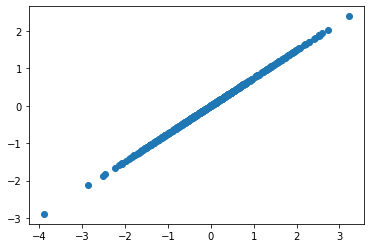

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x, y_lin)
plt.show()

In [6]:
k_sq = gpf.kernels.SquaredExponential(variance=2, lengthscales=0.1)
y_sq = np.random.multivariate_normal(np.zeros(500), k_sq.K(x), 1).T

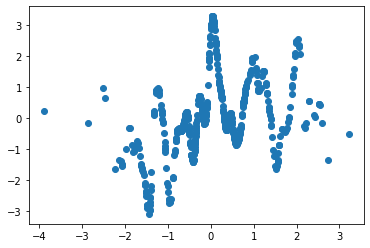

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x, y_sq)
plt.show()

In [8]:
kernel = gpf.kernels.Sum([k, k_sq])

In [9]:
y_lin.shape

(500, 1)

2984.148177227752
╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤══════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │    value │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪══════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 0.551301 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼──────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 1e-06    │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧═════════╧══════════╛


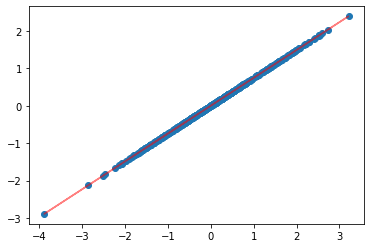

In [11]:
from gpflow.utilities import print_summary


m_lin = gpf.models.GPR(data=(x, y_lin), kernel=k, mean_function=None)
opt = gpf.optimizers.Scipy()
opt_logs = opt.minimize(
    m_lin.training_loss, m_lin.trainable_variables, options=dict(maxiter=100000)
)
print(m_lin.log_marginal_likelihood().numpy())
print_summary(m_lin)

pred_y_mean, pred_y_var = m_lin.predict_y(x)
plt.scatter(x, y_lin)
plt.plot(x, pred_y_mean, alpha=0.5, color='r')
plt.show()

2372.1452025921094
╒════════════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════════╕
│ name                               │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │       value │
╞════════════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════════╡
│ GPR.kernel.kernels[0].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 6.34764e-07 │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────────┤
│ GPR.kernel.kernels[1].variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 1.75445     │
├────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────────┤
│ GPR.kernel.kernels[1].lengthscales │ Parameter │ Softplus         │         │ True 

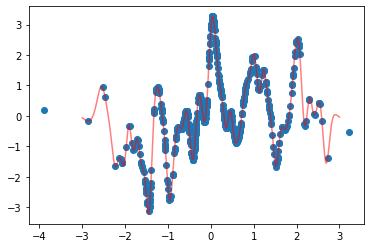

In [12]:
from gpflow.utilities import print_summary


m = gpf.models.GPR(data=(x, y_sq), kernel=kernel, mean_function=None)
opt = gpf.optimizers.Scipy()
opt_logs = opt.minimize(
    m.training_loss, m.trainable_variables, options=dict(maxiter=100000)
)
print(m.log_marginal_likelihood().numpy())
print_summary(m)

x_new = np.linspace(-3, 3, 1000)[:, None]
pred_y_mean, pred_y_var = m.predict_y(x_new)

plt.scatter(x, y_sq)
plt.plot(x_new, pred_y_mean, alpha=0.5, color='r')
plt.show()

In [44]:
1491289.1765065792 < 1491764.3546789452


True